<h1><font text-align="center"><strong>Programming Basics and Data Analytics with Python</strong></font></h1>
<h2><p text-align="center"><strong>App Rating Prediction</strong> by NIRANJANRAAJ.C.S</p></h2>

<font size="4"><u>DESCRIPTION:</u></font>
<p><p><font size="4"><u>Objective:</u></font><p> Make a model to predict the app rating, with other information about the app provided.</p>
<p><p><font size="4"><u>Problem Statement:</u></font></p>
Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.</p>
<p><font size="4"><u>Domain: General</u></font></p>
<p><p><font size="4"><u>Analysis to be done:</u> </font></p>The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.</p>
<p><font size="4"><u>Content:</u></font></p><p> Dataset: Google Play Store data (“googleplaystore.csv”)</p>
<font size="4"><u>Fields in the data:</u></font>
    <ul>
<li>App: Application name</li>
<li>Category: Category to which the app belongs </li>
<li>Rating: Overall user rating of the app</li>
<li>Reviews: Number of user reviews for the app</li>
<li>Size: Size of the app</li>
<li>Installs: Number of user downloads/installs for the app</li>
<li>Type: Paid or Free</li>
<li>Price: Price of the app</li>
<li>Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult</li>
<li>Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.</li>
<li>Last Updated: Date when the app was last updated on Play Store</li>
<li>Current Ver: Current version of the app available on Play Store</li>
<li>Android Ver: Minimum required Android version</li>
</ul>

<h4>1.	Load the data file using pandas.</h4> 

In [2]:
#import numpy and pandas library
import numpy as np
import pandas as pd

In [3]:
#Load the "googleplaystore.csv" file
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
c = df.columns
c

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<h4>2.Check for null values in the data. Get the number of null values for each column.</h4>

In [7]:
#checking the null values in the data 
#getting the nummber of null values for each column
null={}
for col in c:
    null[col]=df[col].isna().sum()
null

{'App': 0,
 'Category': 0,
 'Rating': 1474,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 1,
 'Price': 0,
 'Content Rating': 1,
 'Genres': 0,
 'Last Updated': 0,
 'Current Ver': 8,
 'Android Ver': 3}

<h4>3.	Drop records with nulls in any of the columns.</h4> 

In [8]:
nan_value = float("NaN")
#Convert NaN values to empty string
df.replace("", nan_value, inplace=True)
#dropping the rows with null values in any columns
df.dropna(subset = c, inplace=True)

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
#checking for null values in the data
null={}
for col in c:
    null[col]=df[col].isna().sum()
null

{'App': 0,
 'Category': 0,
 'Rating': 0,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 0,
 'Price': 0,
 'Content Rating': 0,
 'Genres': 0,
 'Last Updated': 0,
 'Current Ver': 0,
 'Android Ver': 0}

In [11]:
df.shape

(9360, 13)

<p><h4>4.Variables seem to have incorrect type and inconsistent formatting. You need to fix them:</h4></p>
<p><h5>&nbsp;&nbsp;&nbsp;&nbsp;1.Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.</h5></p>

In [12]:
#the numeric value from the column is extracted
x = df[df["Size"].str.contains("M|k")]
z = x['Size'].str.split('([A-Za-z]+)', expand=True)
z.rename(columns={0:'x', 1:'y',2:'k'}, inplace=True)
z.x = pd.to_numeric(z.x)

#the values in MB are multiplied by 1000
z = z.assign(new = np.where(z.y=='M',z.x*1000,z.x))
df["Size"] = z.new

In [13]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<h5>2.Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).</h5>

In [14]:
#the values in the review column are convertd to numeric
df["Reviews"]=pd.to_numeric(df["Reviews"])

In [15]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<h5>3.Installs field is currently stored as string and has values like 1,000,000+.</h5>
<h6>&nbsp;&nbsp;&nbsp;&nbsp;1.Treat 1,000,000+ as 1,000,000</h6>
<h6>&nbsp;&nbsp;&nbsp;&nbsp;2.remove ‘+’, ‘,’ from the field, convert it to integer</h6>

In [16]:
#the '+',',' are removed fron the values
df["Installs"]=df["Installs"].str.replace("+","")
df["Installs"]=df["Installs"].str.replace(",","")

#the values are converted to numeric
df["Installs"]=pd.to_numeric(df["Installs"])

In [17]:
df["Installs"].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

<h5>4.Price field is a string and has '<span>&#36;</span>' symbol. Remove ‘&#36;’ sign, and convert it to numeric.</h5>

In [18]:
#the '$' character is removed
df["Price"]=df["Price"].str.replace("$","")

#the values are converted to numeric
df["Price"]=pd.to_numeric(df["Price"])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<h4>5. Sanity checks:</h4>
<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.</h5>

In [19]:
#dropping the rows which have rating values outside the range 1 to 5
df=df[(df["Rating"]>=1)&(df["Rating"]<=5)]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df.shape

(9360, 13)

<h5>2.Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.</h5>

In [21]:
#dropping the rows which have reviews more than installs
df=df[df["Reviews"]<=df["Installs"]]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
df.shape

(9353, 13)

<h5>3.For free apps (type = “Free”), the price should not be >0. Drop any such rows.</h5>

In [23]:
#checking free apps having price >0  
df[(df["Type"]=="Free")&(df["Price"]>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [24]:
#since there are no such rows, no further operation is performed.

<h5>5.Performing univariate analysis</h5>

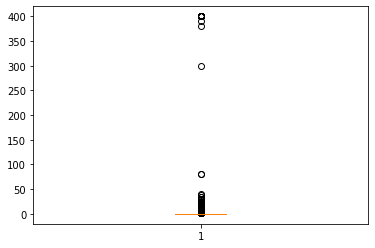

In [25]:
#creating boxplot for price values
import matplotlib.pyplot as plt
plt.boxplot(df["Price"])
plt.show()

In [26]:
#the outliers are present where the price exceeds $200.
#the usual paid apps have price upto $50 which is reasonable

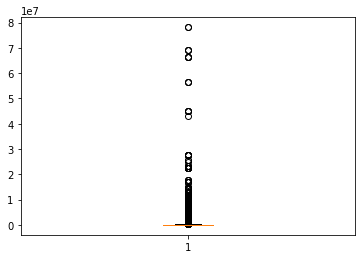

In [27]:
#creating boxplot for price values
plt.boxplot(df["Reviews"])
plt.show()

In [28]:
#there are some apps which have more reviews above 4 million and the highest review is upto 8 million
#the values might be right because the app may be used by many people and the app might be great or worse.

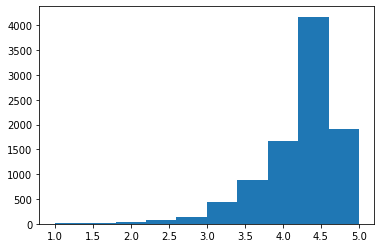

In [29]:
#creating histogram for rating 
plt.hist(df["Rating"],bins=10)
plt.show()

In [30]:
#the ratings are distributed in the increasing order.
#the ratings range 4 - 4.5 are given for most of the apps. 

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


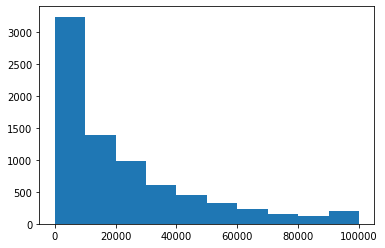

In [31]:
#creating histogram for size
plt.hist(df["Size"],bins=10)
plt.show()

In [32]:
#the apps with less size are installed by many users
#as the size increases, the users for the app decreases

<h4>6.Outlier treatment</h4>

In [33]:
#checking the records of the apps with price greater than $200
df[df["Price"]>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [34]:
#the rows with price above $200 are dropped
df=df[df["Price"]<200]

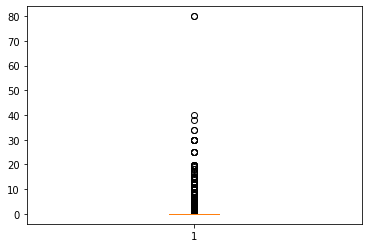

In [35]:
plt.boxplot(df["Price"])
plt.show()

In [36]:
#dropping rows having reviews more than 2million
df=df[df["Reviews"]<2000000]

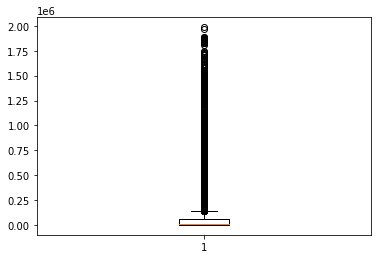

In [37]:
plt.boxplot(df["Reviews"])
plt.show()

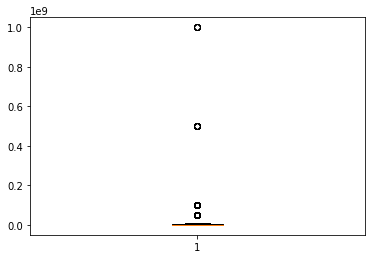

In [38]:
#creating boxplot for installs
plt.boxplot(df["Installs"])
plt.show()

In [39]:
#calculating different percentage for installs
Q = [.1,.25,.5,.7,.9,.95,.99]
df["Installs"].quantile(Q)

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [40]:
#calculating interquartile range
q1=df["Installs"].quantile(0.25)
q3=df["Installs"].quantile(0.75)
iqr=q3-q1

In [41]:
#finding the upper quartile range
uq=q3+1.5*iqr
uq

12485000.0

In [42]:
#the apps with high number of installs are removed
df=df[df["Installs"]<=uq]

In [43]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [44]:
df.shape

(8496, 13)

<p><h4>7.Bivariate Analysis</h4></p>

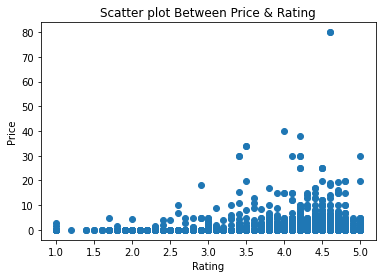

In [45]:
#create scatter plot for Rating vs Price 
x=df["Rating"]
y=df["Price"]
plt.scatter(x,y)
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Scatter plot Between Price & Rating")
plt.show()

In [46]:
#the price of apps increases as the rating increases 

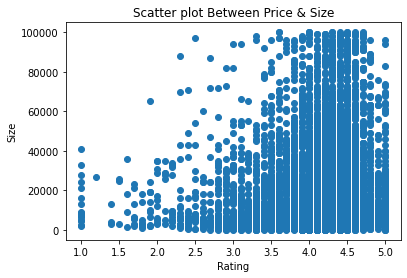

In [47]:
#create scatter plot for Rating vs Size
x=df["Rating"]
y=df["Size"]
plt.scatter(x,y)
plt.xlabel("Rating")
plt.ylabel("Size")
plt.title("Scatter plot Between Price & Size")
plt.show()

In [48]:
#the Rating is greater for the apps having large size

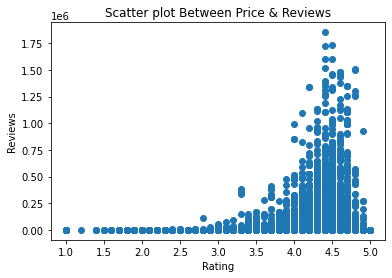

In [49]:
#create scatter plot for Rating vs Reviews
x=df["Rating"]
y=df["Reviews"]
plt.scatter(x,y)
plt.xlabel("Rating")
plt.ylabel("Reviews")
plt.title("Scatter plot Between Price & Reviews")
plt.show()

In [50]:
#the apps with higher rating have more reviews

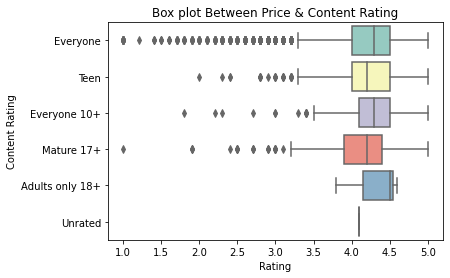

In [51]:
#import seaborn library
import seaborn as sns

#create box for Rating vs Content Rating
x=df["Rating"]
y=df["Content Rating"]
sns.boxplot(x,y,data =df,palette="Set3")
plt.xlabel("Rating")
plt.ylabel("Content Rating")
plt.title("Box plot Between Price & Content Rating")
plt.show()

In [52]:
#there is no difference in rating when compared against content rating
#all the contents are liked by all the people
#the apps used by everyone have many outliers

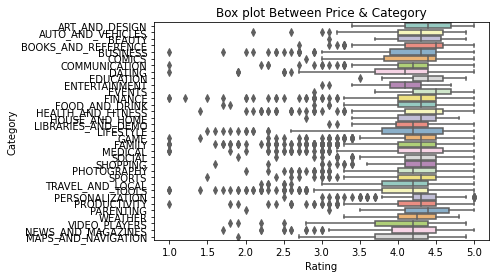

In [53]:
#create box plot for Rating vs Size
x=df["Rating"]
y=df["Category"]
sns.boxplot(x,y,data =df,palette="Set3")
plt.xlabel("Rating")
plt.ylabel("Category")
plt.title("Box plot Between Price & Category")
plt.show()

In [54]:
#the genres which have best ratings are art and design, events and parenting

<h4>8.Data Preprocessing</h4>

In [55]:
#create a copy of the dataframe and name it inp1.
inp1 = df

In [56]:
#Reviews and Install have some values that are still relatively very high. 
#Before building a linear regression model, you need to reduce the skew. 
#Apply log transformation (np.log1p) to Reviews and Installs.
inp1["Reviews"]=np.log1p(inp1["Reviews"])
inp1["Installs"]=np.log1p(inp1["Installs"])

In [57]:
#Drop columns App, Last Updated, Current Ver, and Android Ver.
inp1 = inp1.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1)
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design


In [58]:
#Get dummy columns for Category, Genres, and Content Rating. 
#This needs to be done as the models do not understand categorical data, and all data should be numeric. 
#Dummy encoding is one way to convert character fields to numeric. 
#Name of dataframe should be inp2.
inp2 = inp1.loc[:,["Type","Category","Content Rating","Genres"]]
inp2 = pd.get_dummies(inp2,drop_first=True)
inp2 = inp2.reset_index(drop=True)
inp2.head()

,Type_Paid,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
inp1= inp1.drop(['Type','Category','Content Rating','Genres'], axis=1)
inp1 = inp1.reset_index(drop = True)
inp1.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,5.075174,19000.0,9.210440,0.0
1,3.9,6.875232,14000.0,13.122365,0.0
2,4.7,11.379520,8700.0,15.424949,0.0
3,4.3,6.875232,2800.0,11.512935,0.0
4,4.4,5.123964,5600.0,10.819798,0.0


In [60]:
#Create a new dataset by combining categorical data for model building.
p = inp1["Rating"]
inp1 = inp1.drop(columns = ["Rating"],axis = 1)
pre = pd.concat([inp1,inp2],axis=1)

In [61]:
pre.head()

,Reviews,Size,Installs,Price,Type_Paid,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
pre['Rating'] = p
pre.head()

,Reviews,Size,Installs,Price,Type_Paid,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Rating
0,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.1
1,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.9
2,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.7
3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.3
4,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.4


<h4>9.Train test split and apply 70-30 split. Name the new dataframes df_train and df_test.<h4>

In [63]:
#import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(pre,test_size = 0.3,random_state = 1234)

In [76]:
#Remove records with NaN values in the dataset
Nan_value = float("NaN")
df_train.replace("", nan_value, inplace=True)
df_test.replace("", nan_value, inplace=True)
df_train.dropna(subset=['Size'], inplace=True)
df_test.dropna(subset=['Size'], inplace=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [77]:
df_train.head()

,Reviews,Size,Installs,Price,Type_Paid,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Rating
6509,6.861711,7600.0,9.210440,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.5
4202,4.521789,2800.0,8.517393,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.6
7218,2.397895,3100.0,8.517393,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.2
3787,5.680173,7900.0,9.210440,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.5
8253,3.637586,14000.0,6.908755,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.4


In [78]:
df_test.head()

,Reviews,Size,Installs,Price,Type_Paid,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Rating
2545,11.140934,48000.0,15.424949,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
6634,10.288342,16000.0,13.815512,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.1
7273,3.367296,2500.0,9.210440,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.1
5985,10.589081,51000.0,15.424949,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.4
2507,5.891644,2200.0,10.819798,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.1


<h4>10.Separate the dataframes into X_train, y_train, X_test, and y_test.<h4>

In [88]:
X_train, Y_train,X_test, Y_test = train_test_split(df_train.transpose(),df_test.transpose(),test_size = 0.3)

<h4>11.Model Building<h4>

In [89]:
#import LinearRegression from sklearn.linear_model library
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
X = X_train.transpose()
Y = Y_train.transpose()

In [90]:
#Use linear regression
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
#Report the R2 on the train set
r2 = lm.score(X,Y)
r2

/usr/local/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8911547063922737

<h4>12. Make predictions on test set and report R2.<h4>

In [92]:
#predict model with test dataset
yhat=lm.predict(X_test.transpose())

In [93]:
lm.coef_

array([[-5.75741591e-02, -7.23409542e-04,  9.71445147e-17, ...,
        -2.70734462e-02, -1.19928131e-02, -4.47415942e-02],
       [-1.20541396e-14, -2.99426306e-12, -7.97972799e-17, ...,
        -3.33069696e-12, -4.89986524e-12, -2.66828920e-12],
       [-1.98088516e-02, -2.14475183e-01,  1.21430643e-16, ...,
        -2.13616418e-01, -2.15550628e-01, -1.94909510e-01],
       ...,
       [ 1.64177432e-14,  3.91888479e-12, -5.55111512e-17, ...,
         4.34911726e-12,  6.39820358e-12,  3.48380699e-12],
       [ 4.03507010e-14,  9.80598093e-12,  1.73472348e-17, ...,
         1.08919106e-11,  1.60230509e-11,  8.72523581e-12],
       [-1.13962781e-01, -6.44969410e-02,  1.52655666e-16, ...,
        -8.78008665e-02, -8.78166424e-02, -8.51756643e-02]])

In [94]:
lm.intercept_

array([ 1.26580081e-01,  2.37504461e-13,  1.56259616e-02,  4.91343077e-14,
        6.90211777e-14,  0.00000000e+00,  8.74248590e-14,  1.57869970e-02,
        3.42000733e-15,  0.00000000e+00,  7.29050339e-04,  4.33657071e-03,
       -8.92030308e-05,  4.33657071e-03,  6.88858692e-15,  4.94419605e-03,
        4.37819312e+00,  1.19096690e-03, -4.76771400e-14,  6.64295008e-14,
        1.26580081e-01, -1.40238841e-15,  4.40183372e-15,  3.90764919e-03,
        5.94447535e-03,  7.34040136e-04,  1.88606359e-03,  3.96046291e+00,
        3.29016685e-03,  4.78110607e-13,  7.97257694e-01, -2.14481215e-04,
        2.82017465e-13,  5.60112446e-02,  9.72653130e-03,  1.00058584e+00,
        1.19822525e-02,  2.85654324e-04,  9.32379174e-14,  5.21601971e-03,
        1.70622179e-02,  8.92702579e-13,  2.75196011e-02,  1.21431977e-02,
        1.48665172e-03, -2.74322232e-13, -6.74977435e-13,  3.07642529e-01])

In [95]:
#Report the R2 on the train set
R2=lm.score(X_test.transpose(),Y_test.transpose())
R2

/usr/local/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8899518783117278